In [1]:
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt

In [2]:
folder_path = "imaageS"  # Update this with the path to your images folder
image_files = glob.glob(os.path.join(folder_path, '*.jp*g'))

images = []

In [3]:
for image_path in image_files:
    img = cv.imread(image_path)
    if img is not None:
        images.append(img)
    else:
        print(f"Error reading image: {image_path}")

print(f"Read {len(images)} images from the folder.")

Read 9 images from the folder.


In [6]:
def resize_images(images, output_folder, new_size=(300, 300)):
    resized_images = []
    for img, image_path in zip(images, image_files):
        resized_img = cv.resize(img, new_size)
        resized_images.append(resized_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder, "resized_" + filename), resized_img)
    return resized_images

def apply_color_transform(images, output_folder1):
    transformed_images = []
    for img, image_path in zip(images, image_files):
        transformed_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        transformed_images.append(transformed_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder1, "transformed_" + filename), transformed_img)
    return transformed_images

def normalize_images(images, output_folder2):
    normalized_images = []
    for img, image_path in zip(images, image_files):
        # Example normalization: Convert to float32 and scale to [0, 1]
        normalized_img = img.astype('float32') / 255.0
        normalized_images.append(normalized_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder2, "normalized_" + filename), (normalized_img * 255).astype('uint8'))
    return normalized_images

In [7]:
output_folder = r"all"
output_folder1 = r"trans"
output_folder2 = r"norm"

# Perform image pre-processing steps
resized_images = resize_images(images, output_folder)
transformed_images = apply_color_transform(images, output_folder1)
normalized_images = normalize_images(images, output_folder2)

print("Image pre-processing completed.")

Image pre-processing completed.


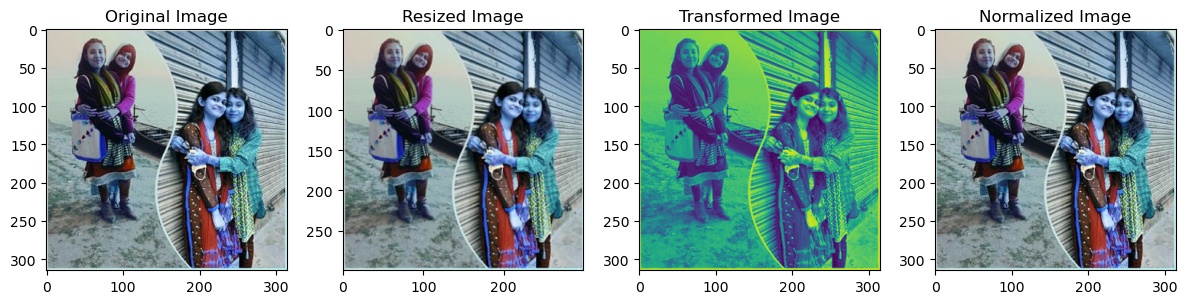

In [8]:
plt.figure(figsize = [12, 4])
plt.subplot(141)
plt.imshow(images[2])
plt.title('Original Image')

plt.subplot(142)
plt.imshow(resized_images[2])
plt.title('Resized Image')

plt.subplot(143)
plt.imshow(transformed_images[2])
plt.title('Transformed Image')

plt.subplot(144)
plt.imshow(normalized_images[2])
plt.title('Normalized Image')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np

def apply_filters(images, output_folder):
    lowpass_images = []
    highpass_images = []
    gaussian_images = []
    laplacian_images = []
    median_images = []
    box_images = []
    for image, image_path in zip(images, image_files):
        filename = os.path.basename(image_path)
        # Low pass filter
        lowpass = cv.GaussianBlur(image, (3, 3), 0)
        lowpass_images.append(lowpass)
        # High pass filter
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        highpass = cv.filter2D(image, -1, kernel)
        highpass_images.append(highpass)

        # Gaussian filter
        gaussian = cv.GaussianBlur(image, (3, 3), 0)
        gaussian_images.append(gaussian)

        # Laplacian filter
        laplacian = cv.Laplacian(image, cv.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        laplacian_images.append(laplacian)

        # Median filter
        median = cv.medianBlur(image, 3)
        median_images.append(median)

        # Box filter
        box = cv.boxFilter(image, -1, (3, 3))
        box_images.append(box)

        # Save filtered images
        cv.imwrite(os.path.join(output_folder, "lowpass_" + filename), lowpass)
        cv.imwrite(os.path.join(output_folder, "highpass_" + filename), highpass)
        cv.imwrite(os.path.join(output_folder, "gaussian_" + filename), gaussian)
        cv.imwrite(os.path.join(output_folder, "laplacian_" + filename), laplacian)
        cv.imwrite(os.path.join(output_folder, "median_" + filename), median)
        cv.imwrite(os.path.join(output_folder, "box_" + filename), box)
    return lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images

# Create directories to save filtered images
folder_path = r"filters"
output_folder = os.path.join(folder_path, "filtered_images")
os.makedirs(output_folder, exist_ok=True)

lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images = apply_filters(images, output_folder)


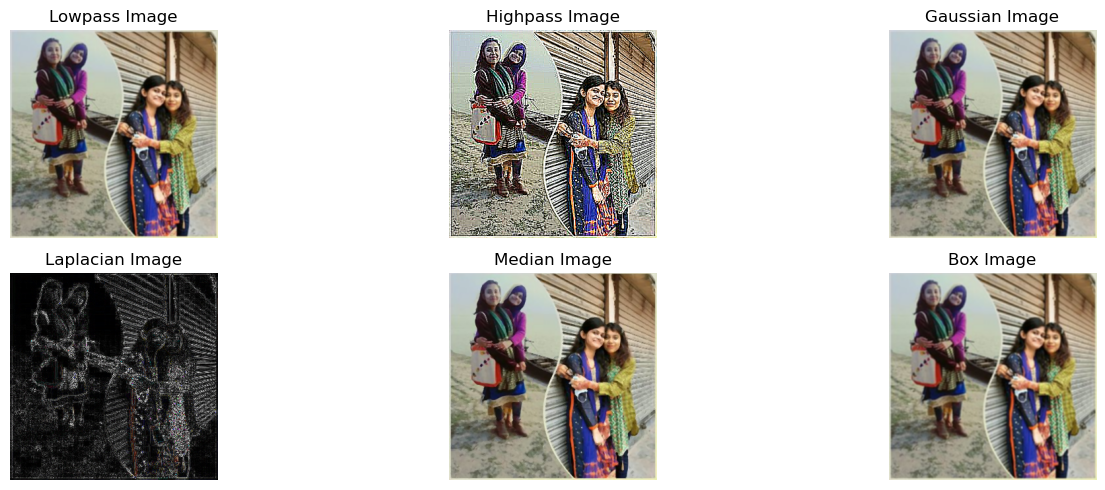

In [10]:
def plot_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images = [lowpass_images[2], highpass_images[2], gaussian_images[2], laplacian_images[2], median_images[2], box_images[2]]
titles = ['Lowpass Image', 'Highpass Image', 'Gaussian Image', 'Laplacian Image', 'Median Image', 'Box Image']
plot_images(images, titles)